# Introduction to Deep Learning - Formula 1 Car Recognition using CNN

## 1. Setup and Load Data

### 1.1 Importing Dependencies

In [88]:
import tensorflow as tf
import os
import cv2 as cv
import imghdr
from matplotlib import pyplot as plt

In [89]:
## Avoid out of memory error by setting GPU Memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

### 1.2 Remove Faulty Images

In [90]:
data_dir = 'data/Formula One Cars'

In [91]:
os.listdir(data_dir)

['AlphaTauri F1 car',
 'Ferrari F1 car',
 'McLaren F1 car',
 'Mercedes F1 car',
 'Racing Point F1 car',
 'Red Bull Racing F1 car',
 'Renault F1 car',
 'Williams F1 car']

In [92]:
os.listdir(os.path.join(data_dir,'Williams F1 car'))

['00000000.jpg',
 '00000003.jpg',
 '00000006.jpg',
 '00000007.jpg',
 '00000008.jpg',
 '00000010.jpg',
 '00000013.jpg',
 '00000014.jpg',
 '00000015.jpg',
 '00000016.jpg',
 '00000017.jpg',
 '00000018.jpg',
 '00000019.jpg',
 '00000020.jpg',
 '00000022.jpg',
 '00000023.jpg',
 '00000025.jpg',
 '00000027.jpg',
 '00000028.jpg',
 '00000029.jpg',
 '00000030.jpg',
 '00000031.jpg',
 '00000032.jpg',
 '00000033.jpg',
 '00000036.png',
 '00000038.jpg',
 '00000039.jpg',
 '00000041.jpg',
 '00000042.jpg',
 '00000044.jpg',
 '00000045.jpg',
 '00000048.jpg',
 '00000049.jpg',
 '00000051.jpg',
 '00000052.jpg',
 '00000056.jpg',
 '00000057.jpg',
 '00000059.jpg',
 '00000062.jpg',
 '00000065.jpg',
 '00000067.jpg',
 '00000069.jpg',
 '00000071.jpg',
 '00000072.jpg',
 '00000073.jpg',
 '00000074.jpg',
 '00000075.jpg',
 '00000076.png',
 '00000077.jpg',
 '00000080.jpg',
 '00000083.jpg',
 '00000084.jpg',
 '00000085.png',
 '00000086.jpg',
 '00000087.jpg',
 '00000088.jpg',
 '00000089.jpg',
 '00000090.jpg',
 '00000091.jpg

In [93]:
# allowed image extensions
image_exts = ['jpeg','jpg','bmp','png']

In [94]:
#Navigate through each image in every directory to find valid images 
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        #Checks if image can be loaded else exception thrown 
        try:
            img = cv.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

### 1.3 Load Data

In [95]:
# tf.data.Dataset??
# tf.data.Dataset.list_files??

In [96]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [97]:
data = tf.keras.utils.image_dataset_from_directory('data/Formula One Cars') #Builds the image dataset for us on the fly, no need to build labels nor the classes 

Found 2154 files belonging to 8 classes.


The above function also can perform necessary preprocessing for our image

In [98]:
data_iterator = data.as_numpy_iterator() #this will let us allow us to access the data pipeline generator / images from the data

In [99]:
batch = data_iterator.next()

In [100]:
# Images represented as numpy arrays
batch[0]

array([[[[7.13906250e+01, 5.53906250e+01, 4.03906250e+01],
         [7.46093750e+01, 5.86093750e+01, 4.36093750e+01],
         [6.72500000e+01, 5.70781250e+01, 4.04687500e+01],
         ...,
         [2.48000000e+02, 2.54000000e+02, 2.52000000e+02],
         [2.48000000e+02, 2.54000000e+02, 2.52000000e+02],
         [2.48000000e+02, 2.54000000e+02, 2.52000000e+02]],

        [[4.56914062e+01, 3.46406250e+01, 2.30468750e+01],
         [4.26914062e+01, 3.16406250e+01, 2.00468750e+01],
         [4.03906250e+01, 3.25898438e+01, 2.06250000e+01],
         ...,
         [2.48000000e+02, 2.54000000e+02, 2.52000000e+02],
         [2.48000000e+02, 2.54000000e+02, 2.52000000e+02],
         [2.48000000e+02, 2.54000000e+02, 2.52000000e+02]],

        [[2.80000000e+01, 2.10000000e+01, 1.30000000e+01],
         [2.80000000e+01, 2.10000000e+01, 1.30000000e+01],
         [2.52500000e+01, 2.22500000e+01, 1.32500000e+01],
         ...,
         [2.48000000e+02, 2.54000000e+02, 2.52000000e+02],
         [

In [101]:
# labels represented as numpy arrays
batch[1]

array([1, 2, 7, 2, 1, 6, 1, 3, 1, 5, 7, 6, 5, 4, 1, 3, 6, 6, 1, 6, 4, 2,
       7, 5, 7, 7, 5, 4, 1, 5, 4, 3])

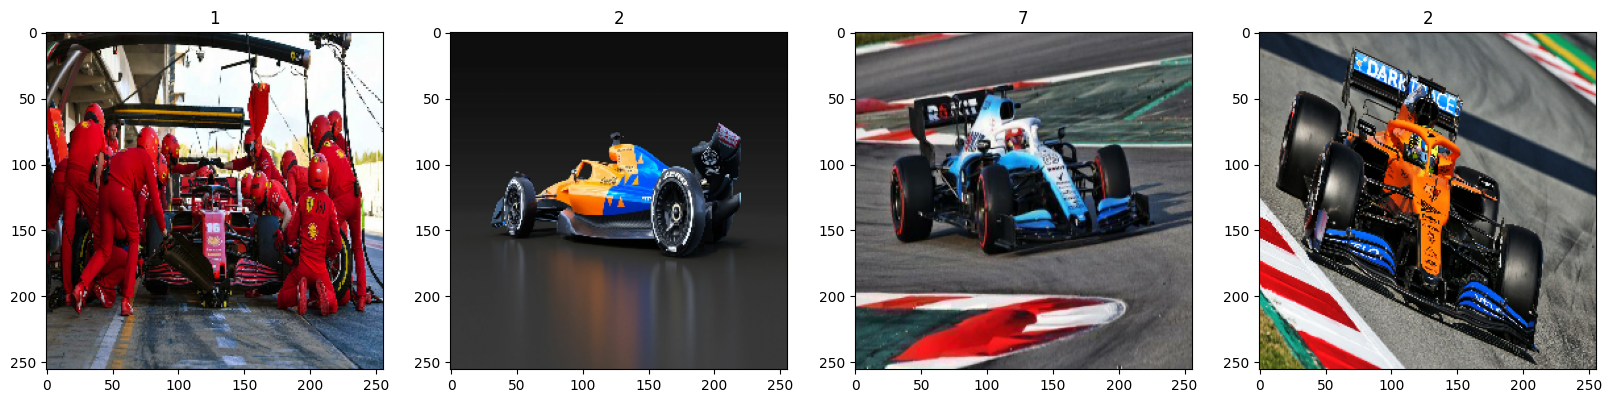

In [102]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


Classes:
0: AlphaTauri 
1: Ferrari
2: McLaren
3: Mercedes
4: Racing Point
5: RedBull 
6: Renault
7: Williams